In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(
    style="whitegrid",
    font_scale=1.0,
    rc={
        "axes.spines.top": False,
        "axes.spines.right": False
    }
)

purple_palette = [
    "#DEC2FF",
    "#9671C9",
    "#7C3AED",
    "#A855F7",
    "#EC4899",
    "#752AAD",
    "#7518F5",
    "#7B26FF",
]

single_purple = "#7C3AED"

from matplotlib.colors import LinearSegmentedColormap
purple_cmap = LinearSegmentedColormap.from_list(
    "purple_cmap",
    ["#FDF2FF", "#C4B5FD", "#7C3AED", "#4C1D95"]
)

In [3]:
df = pd.read_csv("UNWomen-Marriage-Work-Children.csv")
df.head(15)

,Base Dataset,SERIES Code,SERIES Description,REF_AREA Code,REF_AREA Description,TIME_PERIOD,TIME_DETAIL,OBS_VALUE,UNIT_MEASURE Code,UNIT_MEASURE Description,Number of Children code,Number of Children,Household Type code,Household Type,Sex code,Sex,SOURCE_DETAIL
0,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,4,Afghanistan,2017,2017,18.9,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
1,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,8,Albania,2019,2019,72.7,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
2,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,24,Angola,2011,2011,82.1,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
3,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,32,Argentina,2019,2019,45.3,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
4,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,40,Austria,2019,2019,42.4,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
5,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,50,Bangladesh,2017,2017,26.2,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
6,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,51,Armenia,2018,2018,28.3,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
7,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,52,Barbados,2016,2016,62.6,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
8,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,764,Thailand,2019,2019,62.9,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
9,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,768,Togo,2011,2011,92.0,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Base Dataset              99 non-null     object 
 1   SERIES Code               99 non-null     object 
 2   SERIES Description        99 non-null     object 
 3   REF_AREA Code             99 non-null     int64  
 4   REF_AREA Description      99 non-null     object 
 5   TIME_PERIOD               99 non-null     int64  
 6   TIME_DETAIL               99 non-null     int64  
 7   OBS_VALUE                 99 non-null     float64
 8   UNIT_MEASURE Code         99 non-null     object 
 9   UNIT_MEASURE Description  99 non-null     object 
 10  Number of Children code   99 non-null     object 
 11  Number of Children        99 non-null     object 
 12  Household Type code       99 non-null     object 
 13  Household Type            99 non-null     object 
 14  Sex code    

In [5]:
df.isna().sum()

,0
Base Dataset,0
SERIES Code,0
SERIES Description,0
REF_AREA Code,0
REF_AREA Description,0
TIME_PERIOD,0
TIME_DETAIL,0
OBS_VALUE,0
UNIT_MEASURE Code,0
UNIT_MEASURE Description,0


In [6]:
df = df.rename(columns={
    "REF_AREA Description": "country",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "employment_rate",
})

In [7]:
df["year"] = df["year"].astype(int)
df["employment_rate"] = df["employment_rate"].astype(float)

df.head()

,Base Dataset,SERIES Code,SERIES Description,REF_AREA Code,country,year,TIME_DETAIL,employment_rate,UNIT_MEASURE Code,UNIT_MEASURE Description,Number of Children code,Number of Children,Household Type code,Household Type,Sex code,Sex,SOURCE_DETAIL
0,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,4,Afghanistan,2017,2017,18.9,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
1,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,8,Albania,2019,2019,72.7,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
2,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,24,Angola,2011,2011,82.1,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
3,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,32,Argentina,2019,2019,45.3,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database
4,LFPR,EPR_NC,Prime-age employment-to-population ratio by se...,40,Austria,2019,2019,42.4,%,PERCENT,3+,3+ children under 6 present,Extended households,Extended households,FEMALE,Female,ILOSTAT database


In [8]:
df["Sex"].value_counts()
df["Number of Children"].value_counts()
df["Household Type"].value_counts()
sorted(df["year"].unique())

[np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020)]

In [9]:
df["employment_rate"].describe()

,employment_rate
count,99.000000
mean,46.313131
std,21.890104
min,4.100000
25%,28.000000
50%,45.900000
75%,60.950000
max,93.600000


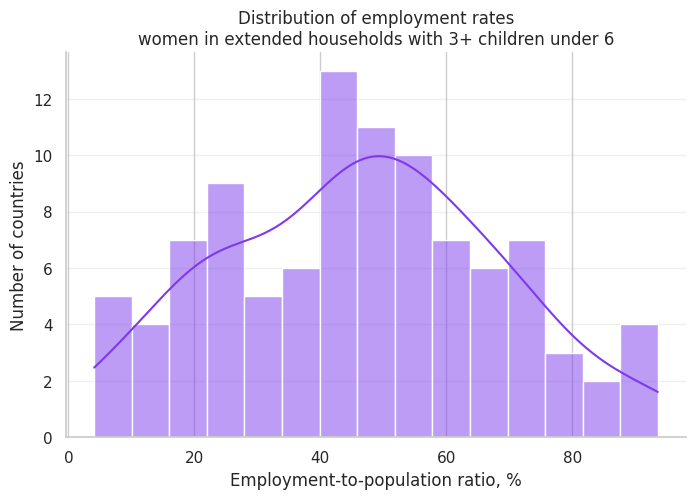

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["employment_rate"], bins=15, kde=True, color=single_purple)
plt.title("Distribution of employment rates\nwomen in extended households with 3+ children under 6")
plt.xlabel("Employment-to-population ratio, %")
plt.ylabel("Number of countries")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

In [12]:
top10 = (
    df.sort_values("employment_rate", ascending=False)
      .head(10)[["country", "employment_rate", "year"]]
)

bottom10 = (
    df.sort_values("employment_rate", ascending=True)
      .head(10)[["country", "employment_rate", "year"]]
)

top10
bottom10

,country,employment_rate,year
68,Lebanon,4.1,2019
21,Yemen,4.3,2014
77,Italy,4.3,2019
82,France,4.8,2019
31,Slovakia,8.5,2019
75,Iraq,12.4,2012
11,Tunisia,12.4,2017
86,Greece,14.7,2019
61,Cyprus,15.4,2019
74,India,16.7,2018


/tmp/ipython-input-1448561280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="employment_rate", y="country", palette=purple_palette)
/tmp/ipython-input-1448561280.py:2: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top10, x="employment_rate", y="country", palette=purple_palette)


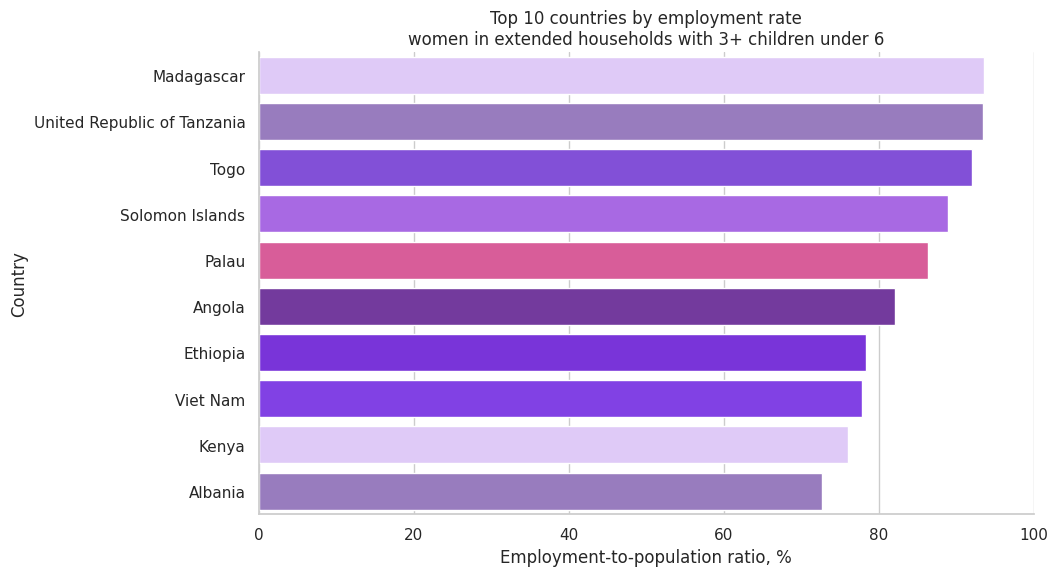

/tmp/ipython-input-1448561280.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10, x="employment_rate", y="country", palette=purple_palette)
/tmp/ipython-input-1448561280.py:10: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=bottom10, x="employment_rate", y="country", palette=purple_palette)


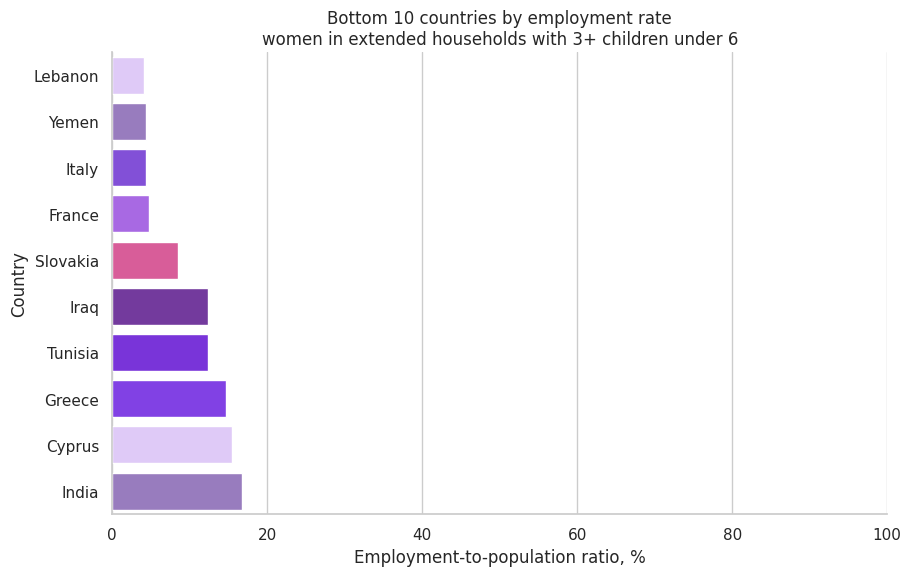

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x="employment_rate", y="country", palette=purple_palette)
plt.title("Top 10 countries by employment rate\nwomen in extended households with 3+ children under 6")
plt.xlabel("Employment-to-population ratio, %")
plt.ylabel("Country")
plt.xlim(0, 100)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=bottom10, x="employment_rate", y="country", palette=purple_palette)
plt.title("Bottom 10 countries by employment rate\nwomen in extended households with 3+ children under 6")
plt.xlabel("Employment-to-population ratio, %")
plt.ylabel("Country")
plt.xlim(0, 100)
plt.show()

In [14]:
rates_by_year = (
    df.groupby("year", as_index=False)["employment_rate"]
      .mean()
      .rename(columns={"employment_rate": "mean_rate"})
)

rates_by_year

,year,mean_rate
0,2010,54.850000
1,2011,65.600000
2,2012,55.200000
3,2013,56.280000
4,2014,55.462500
5,2015,71.300000
6,2016,57.033333
7,2017,37.894118
8,2018,41.016667
9,2019,42.363889


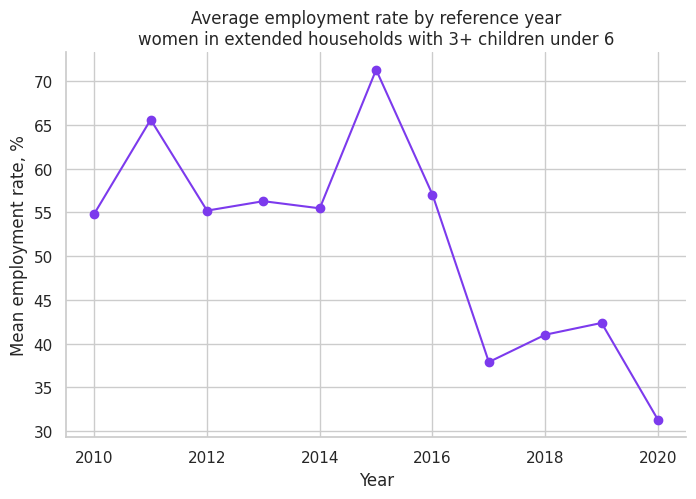

In [15]:
plt.figure(figsize=(8,5))
plt.plot(rates_by_year["year"], rates_by_year["mean_rate"], marker="o", color=single_purple)
plt.title("Average employment rate by reference year\nwomen in extended households with 3+ children under 6")
plt.xlabel("Year")
plt.ylabel("Mean employment rate, %")
plt.grid(True)
plt.show()